### Загрузим игрушечный датасет

In [1]:
from sklearn import datasets

In [52]:
digits = datasets.load_digits()

In [53]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [54]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [77]:
X = digits.data

(1797, 64)

In [56]:
y = digits.target

### Визуализируем данные 

In [57]:
from pandas import DataFrame

In [58]:
digits_frame = DataFrame(digits.data)
digits_frame.columns = digits.feature_names
digits_frame['target'] = digits.target

In [59]:
digits_frame.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [60]:
from sklearn import model_selection
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(digits.data, digits.target, test_size = 0.3)

### Строю дерево решений

In [61]:
from sklearn import tree

In [66]:
clf = tree.DecisionTreeClassifier()

In [67]:
cv = 10
print(model_selection.cross_val_score(clf, X, y, cv=cv).mean())

0.828572315332092


### Бэггинг

In [68]:
from sklearn import ensemble

In [70]:
bclf = ensemble.BaggingClassifier(base_estimator=clf, n_estimators = 100)
print(model_selection.cross_val_score(bclf, X, y, cv=cv).mean())

0.9237274984481688


In [84]:
bclf = ensemble.BaggingClassifier(base_estimator=clf, n_estimators = 100, max_features=8)
print(model_selection.cross_val_score(bclf, X, y, cv=cv).mean())

0.9309931719428924


In [85]:
clf = tree.DecisionTreeClassifier(max_features=8)
bclf = ensemble.BaggingClassifier(base_estimator=clf, n_estimators = 100)
print(model_selection.cross_val_score(bclf, X, y, cv=cv).mean())

0.9460211049037864


In [87]:
random_forest = ensemble.RandomForestClassifier()

In [88]:
print(model_selection.cross_val_score(random_forest, X, y, cv=cv).mean())

0.9471229050279328


In [134]:
random_forest = ensemble.RandomForestClassifier(n_estimators = 100, max_features=5)
print(model_selection.cross_val_score(random_forest, X, y, cv=cv).mean())

0.9526939788950962


In [132]:
import numpy as np
train_sizes, train_scores, test_scores = model_selection.learning_curve(random_forest, X, y, 
                                                                       train_sizes=np.arange(0.1,1., 0.2), 
                                                                       cv=3, scoring='accuracy')

Populating the interactive namespace from numpy and matplotlib


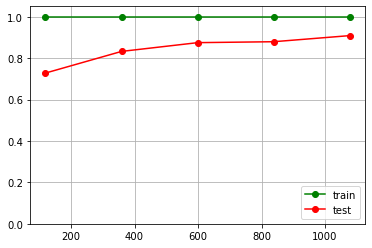

In [133]:
%pylab inline
pylab.grid(True)
pylab.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
pylab.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
pylab.ylim((0.0, 1.05))
pylab.legend(loc='lower right')